# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split , GridSearchCV

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score , classification_report,silhouette_score , precision_score ,f1_score ,recall_score


#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")




# Read Data & Preprocessing 

In [2]:
df = pd.read_csv(r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\archive (6)\cars_info.csv')
df_copy = df.copy()
df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [4]:
df.isna().sum()

ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns = ["Model","Variant","Series"], inplace = True)

#They will not affect our  "Price"
df.drop(columns = ["ID", "Name"], inplace = True)

In [7]:
le=LabelEncoder()
objects=df.select_dtypes(include='object')
for i in objects:
    df[i]=le.fit_transform(df[i])

In [8]:
df.head()

,Price,Brand,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,56,2010,263000,52,1,5,2,2362,76,5
1,117990,39,2021,19,52,1,0,1,2143,15,7
2,79990,39,2021,24,52,1,0,1,2143,15,8
3,34990,39,2010,120579,4,1,0,2,2143,15,4
4,15990,22,2016,72506,45,1,5,2,1796,200,5


# Visualization For Data

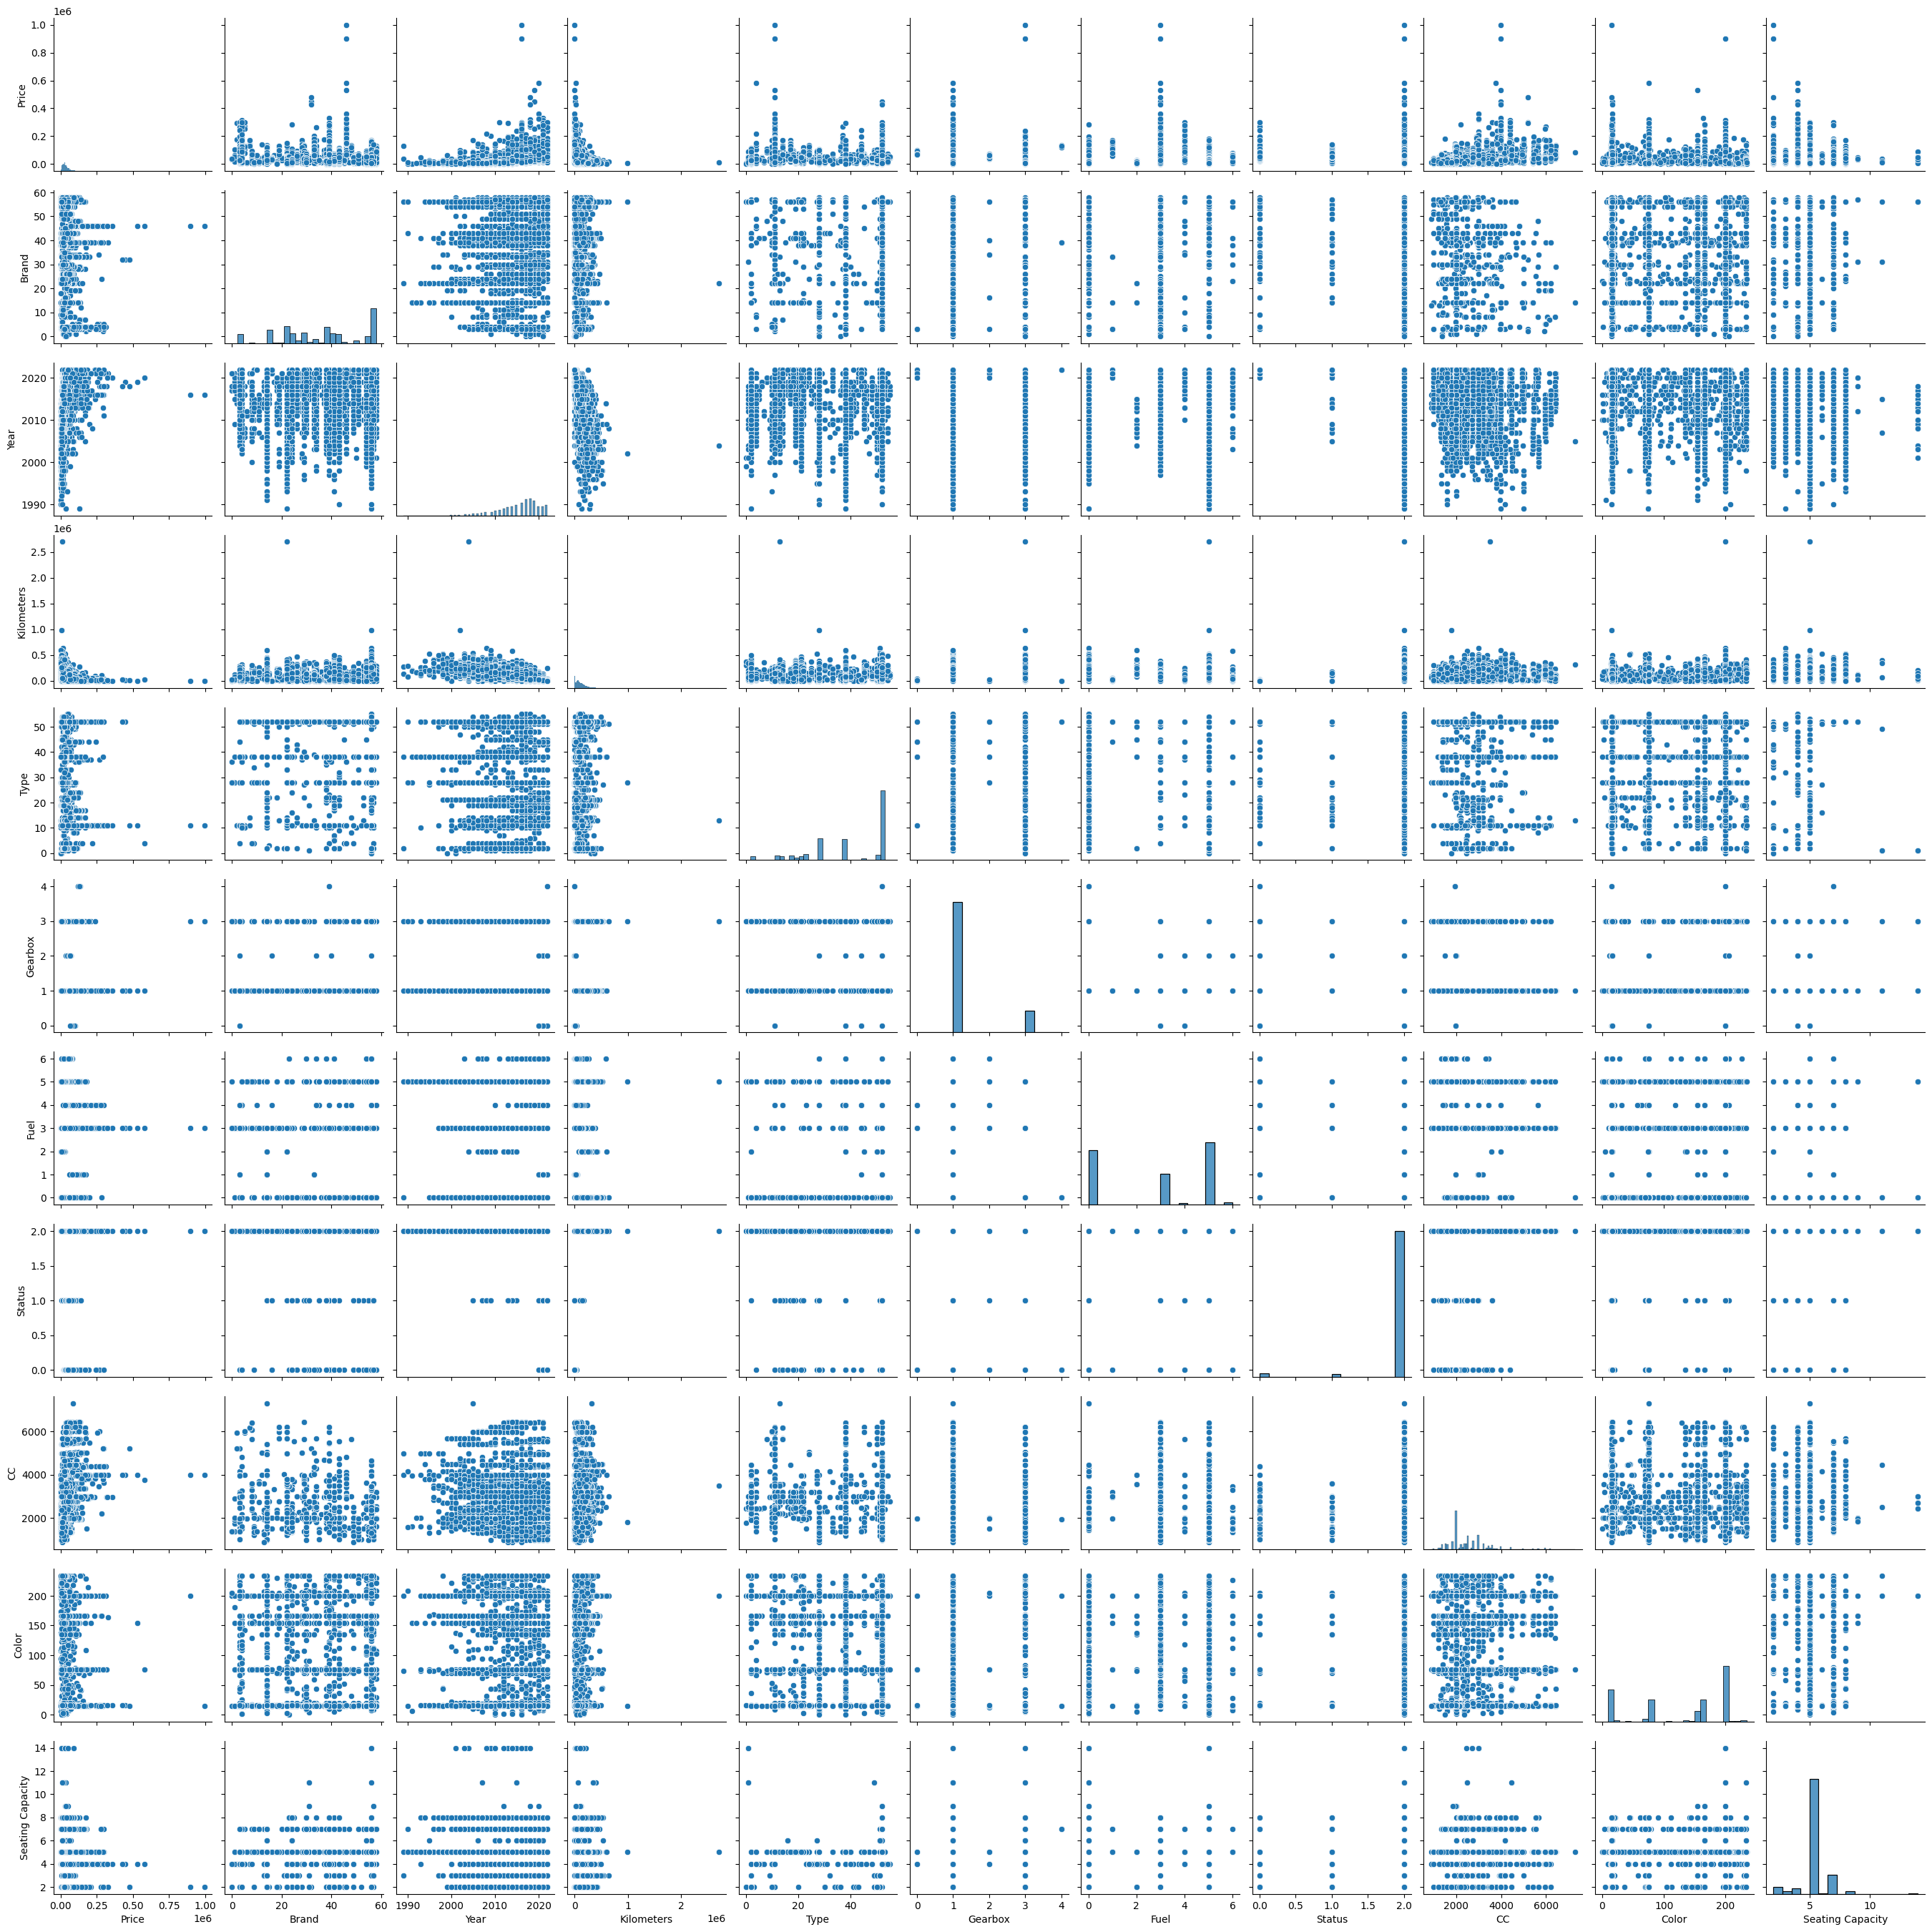

In [9]:
sns.pairplot(df)

<Axes: ylabel='Type'>

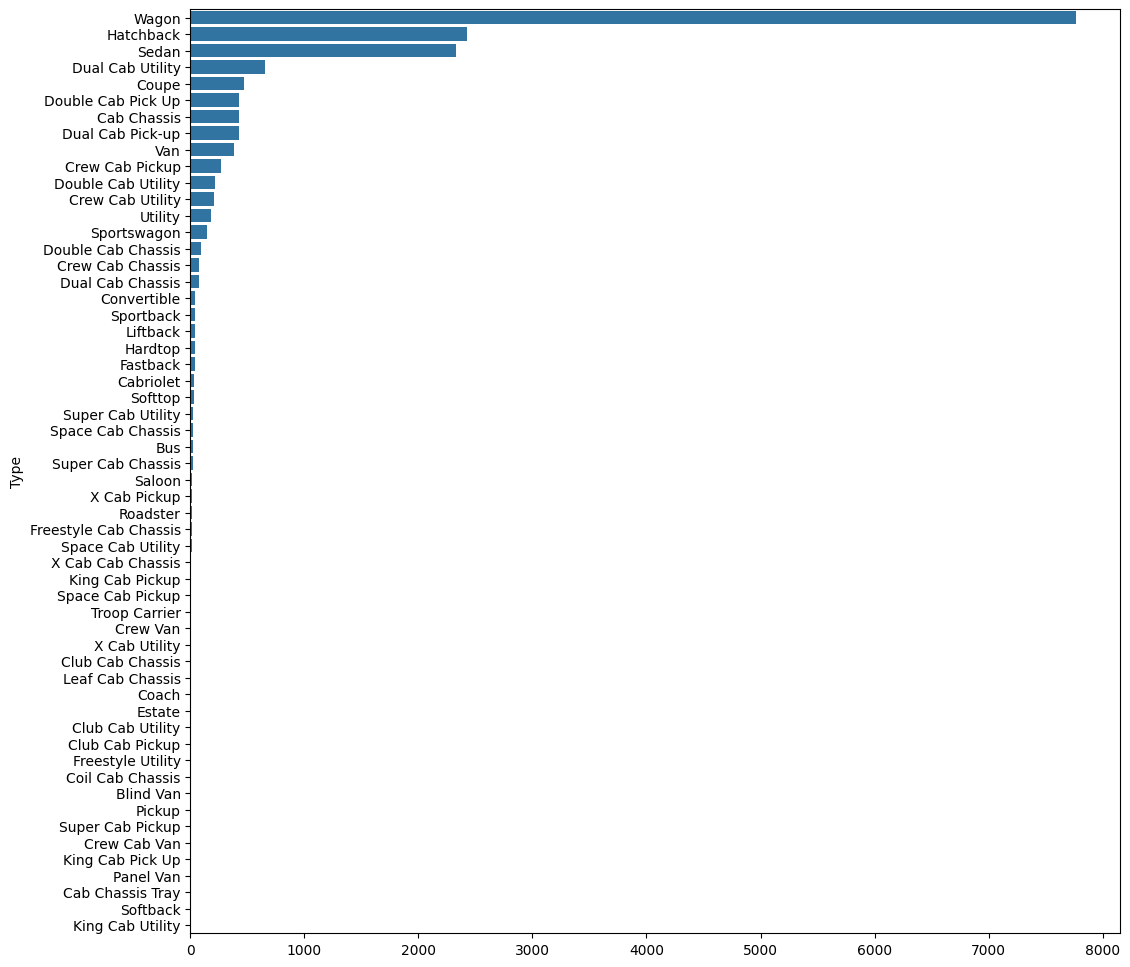

In [10]:
plt.figure(figsize=(12 , 12))
type = df_copy['Type'].value_counts()
sns.barplot(x=type.values , y=type.index)

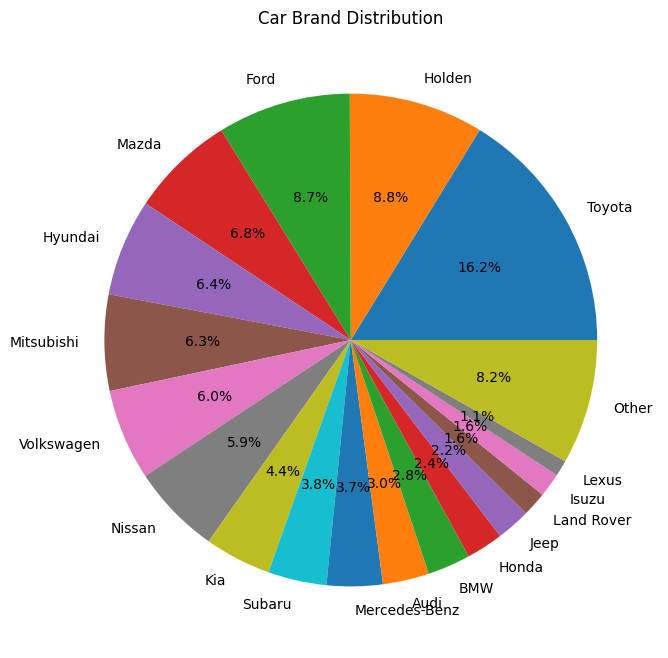

In [11]:
# Calculate car brand counts
brands = df_copy["Brand"].value_counts()
total = brands.sum()

# Set a threshold (1% of total cars) and categorize smaller brands as 'Other'
threshold = total * 0.01
brands_use = brands[brands > threshold]
other_brands = brands[brands <= threshold].sum()

# Append the 'Other' category if it exists
if other_brands > 0:
    brands_use["Other"] = other_brands

# Plotting the pie chart
plt.figure(figsize=(8,8))  # Reduced the figure size to a more typical one
plt.pie(brands_use, labels=brands_use.index, autopct="%1.1f%%")
plt.title("Car Brand Distribution")

# Display the chart
plt.show()


<Axes: ylabel='Gearbox'>

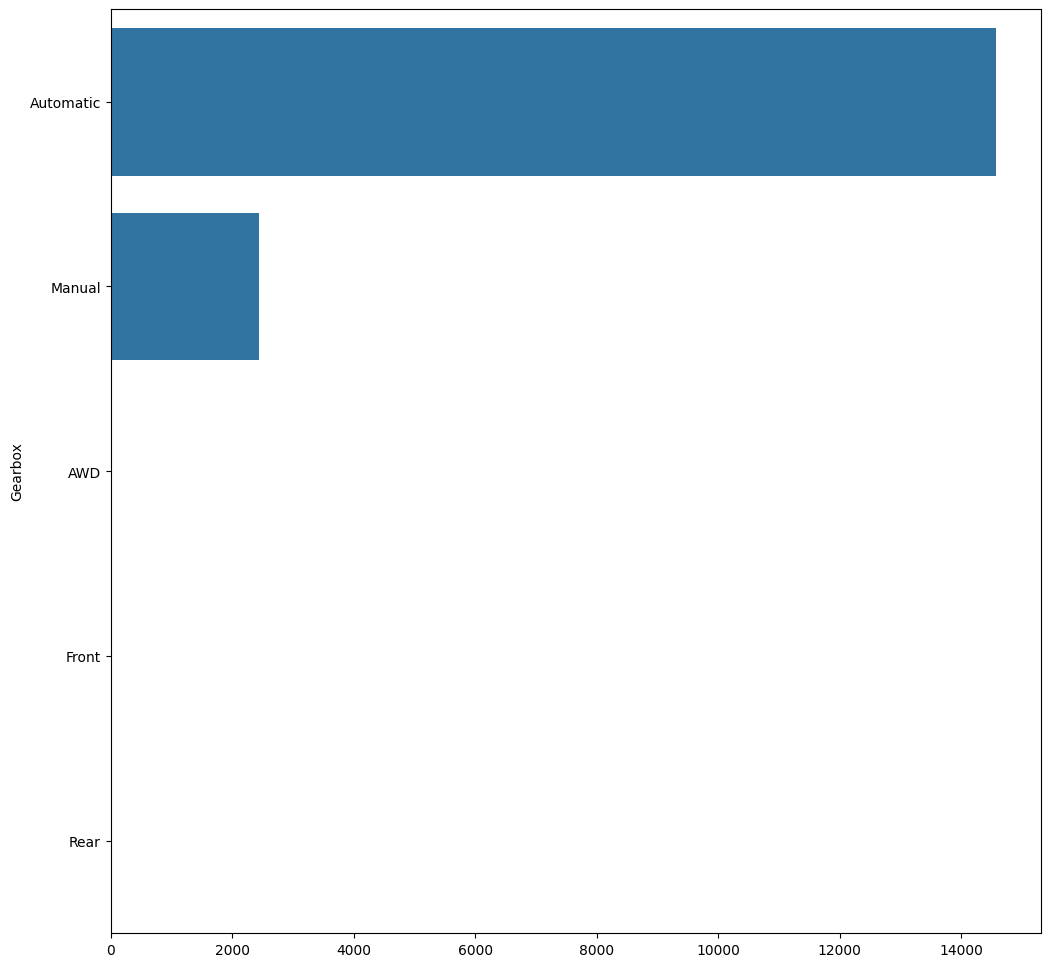

In [12]:
plt.figure(figsize=(12 , 12))
type=df_copy['Gearbox'].value_counts()
sns.barplot(x=type.values , y=type.index)

# Split Data into Train & Test and Try RandomForestClassifier , XGBRegressor

In [13]:
x=df.drop('Price' , axis=1)
y=df['Price']

In [14]:
x

,Brand,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,56,2010,263000,52,1,5,2,2362,76,5
1,39,2021,19,52,1,0,1,2143,15,7
2,39,2021,24,52,1,0,1,2143,15,8
3,39,2010,120579,4,1,0,2,2143,15,4
4,22,2016,72506,45,1,5,2,1796,200,5
...,...,...,...,...,...,...,...,...,...,...
17043,22,2003,230441,38,1,5,2,3791,70,5
17044,56,2008,237113,28,3,5,2,1299,205,5
17045,22,2002,238768,52,1,0,2,2999,70,7
17046,24,2016,49800,28,3,5,2,1797,16,5


In [15]:
y

0          9999
1        117990
2         79990
3         34990
4         15990
          ...  
17043      4499
17044      4999
17045      7999
17046     14000
17047      5999
Name: Price, Length: 17048, dtype: int64

In [16]:
x_train , x_test , y_train ,y_test = train_test_split(x , y , test_size=0.3 , random_state=42)

In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train , y_train)
rf_pred=rf_model.predict(x_test)


In [18]:
print(r2_score(y_test , rf_pred))

0.7150235473125028


In [19]:
xgb_regressor = XGBRegressor(random_state = 0)
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_test)
r2 = xgb_regressor.score(x_test, y_test)
print(r2)

0.8362054943334467
